#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/New One Lab

/content/drive/MyDrive/New One Lab


In [3]:
ls

LabTest-xxx.ipynb  LabTest-xxxx.docx  penguins_size.csv


## Import Packages

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


## Prepare Data

In [84]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [85]:
df.isna().sum()/len(df)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


์New code

In [86]:
df = df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
df.loc[:, 'sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.loc[:, 'sex'] = df['sex'].replace(to_replace='.', value=df['sex'].mode()[0])


In [87]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
culmen_length_mm,0.0
culmen_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


## Categotical Encoding

In [88]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [89]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [90]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [91]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [92]:

X = df.drop('species', axis=1)
y = df['species']

In [103]:
from sklearn.model_selection import train_test_split
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using XXX Alg

In [104]:
# prompt: convert x and y to label encoding

# Encode categorical features using LabelEncoder
X_train['island'] = island_encoder.transform(X_train['island'])
X_train['sex'] = sex_encoder.transform(X_train['sex'])
X_test['island'] = island_encoder.transform(X_test['island'])
X_test['sex'] = sex_encoder.transform(X_test['sex'])

y_train = species_encoder.transform(y_train)
y_test = species_encoder.transform(y_test)

In [108]:
from xgboost import XGBClassifier
# prompt: Create model XGBoost to predict df piline and encorder label x and y colume iland sex and spicy

# Create a pipeline for preprocessing and modeling
model = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', XGBClassifier())
])

# Fit the pipeline to the training data
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

Testing / Evaluation

In [115]:
# Ensure that the model is fitted before prediction
# If this code block runs before fitting the model, uncomment the following lines:
# model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate a classification report
summary_eval = classification_report(y_test, y_pred, digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_rf.png')

plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [24]:
print(df.columns)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_MALE'],
      dtype='object')


In [112]:
# Testing / Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Generate a classification report
summary_eval = classification_report(y_test, y_pred, digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_rf.png')

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Save Model and etc.

                   precision    recall  f1-score   support

species_Chinstrap     1.0000    1.0000    1.0000        47
   species_Gentoo     1.0000    1.0000    1.0000        22

         accuracy                         1.0000        69
        macro avg     1.0000    1.0000    1.0000        69
     weighted avg     1.0000    1.0000    1.0000        69



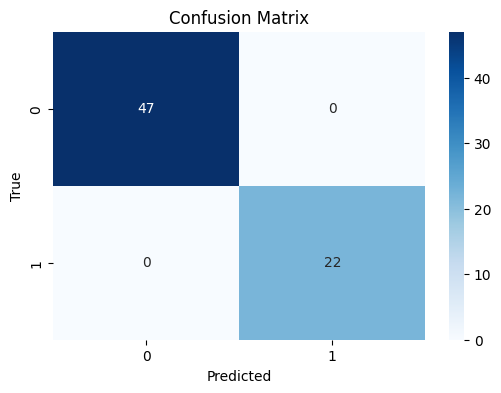

In [60]:
# Save the best model and encoders
data_to_save = (best_estimator, species_encoder, island_encoder, sex_encoder)

# Open a file in binary write mode
with open('model_penguin_65130701931.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

# Testing / Evaluation
# Make predictions
y_pred = best_estimator.predict(X_test)

# Generate a classification report
summary_eval = classification_report(y_test, y_pred, digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_rf.png')

plt.show()


In [61]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_65130701931.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [62]:
import pickle
import pandas as pd

In [63]:

with open('model_penguin_65130701931.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [64]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [65]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [66]:
y_pred_new = model.predict(x_new)

result = y_pred_new

print('KPIs_met_more_than_80: ', result)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- island
- sex
Feature names seen at fit time, yet now missing:
- island_Dream
- island_Torgersen
- sex_MALE
- species_Chinstrap
- species_Gentoo


### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [ ]:
%%writefile app_predict_penguin_XXX.py


#xxxx



## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [ ]:
%%writefile requirements.txt

scikit-learn
pandas
